In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hist_1d(signal, background, x_label, weights=None):
    plt.clf()

    bins = 400

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # signal hist
    ax1.hist(signal, bins=bins, weights=weights, histtype='step', color='blue')
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('Signal', color='blue')

    # dodaje drugą oś Y, ale ma tą samą oś X
    ax2 = ax1.twinx() 

    # background hist
    ax2.hist(background, bins=bins, histtype='step', color='red')
    ax2.set_ylabel('Backgound', color='red')

    title = f'{x_label}_signal_vs_background_12'
    plt.title(title)

    # opis histogramu
    sgn_desc = f'Entries {format(signal.shape[0], ".2e")}\
         \nMean {np.mean(signal):.4f} \nStd dev {np.std(signal):.4f}'
    bckg_desc = f'Entries {format(background.shape[0], ".2e")}\
         \nMean {np.mean(background):.4f} \nStd dev {np.std(background):.4f}'
    hist_desc = f'Signal: {sgn_desc} \n\nBackground: {bckg_desc}'

    # zeby nic nie ucieło
    plt.tight_layout()

    plt.show()


In [3]:
def load_npy(inputfile):
    file_npy = np.load(inputfile, allow_pickle=True)
    
    # oddzielenie labels
    file_labels = list(file_npy[:1].astype(str)[0])

    # oddzielenie danych i zmiana formatu z objet na float64
    file_npy = file_npy[1:].astype('float64')

    return file_npy, file_labels

In [62]:
def prepare_weighted_set(dataset):
    multiply_ratio = 1 / dataset[:, -2].min()
    
    multiply_weights = dataset[:, -2] * multiply_ratio
    multiply_weights = [int(1) if i == multiply_ratio else int(i) for i in multiply_weights]
    
    weighted_array = dataset[0]

    for (i, k) in zip(multiply_weights, range(len(multiply_weights))):
        tmp_array = weighted_array[-1]
        for j in range(multiply_weights[i]):
#             weighted_array = np.vstack((weighted_array, dataset[k]))
            tmp_array = np.vstack((tmp_array, dataset[k]))
    
        weighted_array = np.vstack((weighted_array, tmp_array))
            
    return weighted_array

In [64]:
signal, signal_labels = load_npy('../data/D0_Signal_MonteCarlo_1_2_corrected.npy')
background, background_labels = load_npy('../data/D0_background_1_2_corrected.npy')

In [65]:
small_signal = signal[:8000]
small_bck = background[:16000]

In [69]:
signal_labels

['w',
 'ncoll',
 'm',
 'pt',
 'decayLength',
 'dca12',
 'cosTheta',
 'dcaV0ToPv',
 'ptKaon',
 'dcaKaon',
 'ptPion',
 'dcaPion',
 'matchHftWeight']

In [66]:
name = 'pt'
sl = signal_labels.index(name)
bl = background_labels.index(name)
weights = small_signal[:, 0] * small_signal[:, -1]

In [67]:
small_signal_w = prepare_weighted_set(small_signal)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 13

In [ ]:
small_bck_w = p

bez wag


<Figure size 432x288 with 0 Axes>

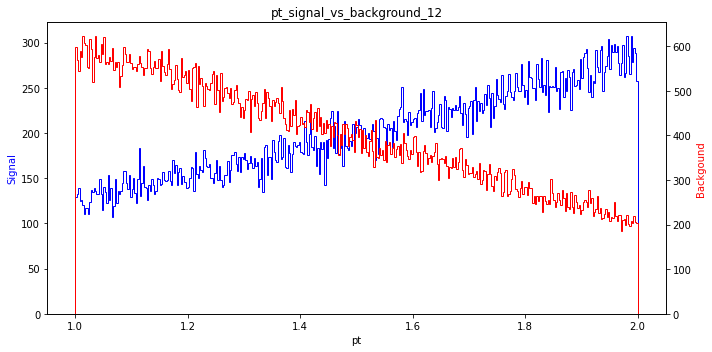

z wagami


<Figure size 432x288 with 0 Axes>

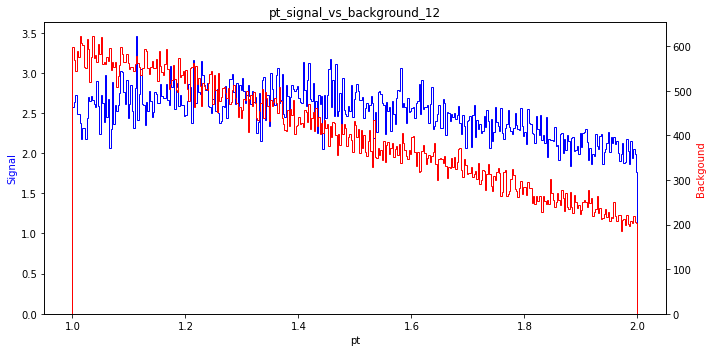

In [60]:
print('bez wag')
hist_1d(small_signal[:, sl], small_bck[:, bl], x_label='pt')


print('z wagami')
hist_1d(small_signal[:, sl], small_bck[:, bl], x_label='pt', weights=weights)